# OSIC Pulmonary Fibrosis: 

Pulmonary fibrosis is a lung disease that occurs when lung tissue becomes damaged and scarred. This thickened, stiff tissue makes it more difficult for your lungs to work properly. As pulmonary fibrosis worsens, you become progressively more short of breath.
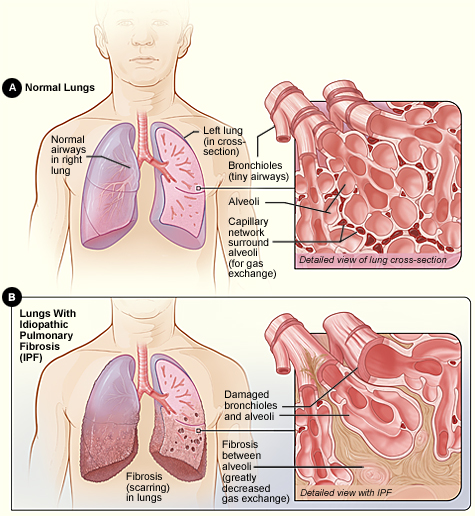

The aim of this competition is to predict a patient’s severity of decline in lung function based on a CT scan of their lungs. Lung function is assessed based on output from a spirometer, which measures the forced vital capacity (FVC), i.e. the volume of air exhaled.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import plotly.express as px

import os
import random
import re
import math
import time


import warnings
warnings.filterwarnings("ignore")


seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)



In [ ]:
black_red = [
    '#1A1A1D', '#4E4E50', '#C5C6C7', '#6F2232', '#950740', '#C3073F'
]
plt.style.use('fivethirtyeight')

# Data

In the dataset, you are provided with a baseline chest CT scan and associated clinical information for a set of patients. A patient has an image acquired at time Week = 0 and has numerous follow up visits over the course of approximately 1-2 years, at which time their FVC is measured.

In the training set, you are provided with an anonymized, baseline CT scan and the entire history of FVC measurements.

In [ ]:
train = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')
sample = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/sample_submission.csv')

In [ ]:
print(train.head())
print(len(train))

In [ ]:
print('Train features:{}'.format(train.columns.tolist()))
print('Test features:{}'.format(test.columns.tolist()))

In [ ]:
print(test.shape)
print(train.isnull().values.any())
print(test.isnull().values.any())

# Analysis of Patient Information:

The distribution graph show the distribution of patient's age, gender and the smoking status.

In [ ]:
data = train.groupby(by="Patient")[["Patient", "Age", "Sex", "SmokingStatus"]].first().reset_index(drop=True)
fig = plt.figure(constrained_layout = True, figsize = (20,9))

#create grid

grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Gender Distribution')


sns.countplot(data['Sex'],
             alpha = 0.9,
             ax = ax1,
             color = '#C3073F',
             label = 'Train',
             order=train['Sex'].value_counts().index)

ax1.legend()

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Smoking Status')
sns.countplot(data['SmokingStatus'],
             alpha = 0.9,
             ax = ax2, 
             color = '#C3073F',
             label = 'Train')
ax2.legend()
plt.xticks(rotation = 20)

ax3 = fig.add_subplot(grid[1, :])
ax3.set_title('Age Distribution')
sns.distplot(data['Age'], ax = ax3, label ='Train', color = '#C3073F')
ax3.legend()
plt.show()

Observation:
1. There are more number of males than females.
2. The majority of patients age between 65 to 75 years.
3. The smoking status shows that there are very few patients who still smokes and a vast no. of patients are ex-smokers.

In [ ]:
fig = plt.figure(constrained_layout = True, figsize = (20,9))

#create grid

grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Gender Distribution')

sns.countplot(test.Sex,
             alpha = 0.9,
             ax = ax1,
             color = '#1A1A1D',
             label = 'Test',
             order=train['Sex'].value_counts().index)

ax1.legend()

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('Smoking Status')
sns.countplot(test.SmokingStatus,
             alpha = 0.9,
             ax = ax2, 
             color = '#1A1A1D',
             label = 'Test',
             order=train['SmokingStatus'].value_counts().index)
ax2.legend()
plt.xticks(rotation = 20)

ax3 = fig.add_subplot(grid[1, :])
ax3.set_title('Age Distribution')
sns.distplot(test.Age, ax = ax3, label ='Test', color = '#1A1A1D')
ax3.legend()
plt.show()

Observation from Test Dataset:
1. All patients are male in test dataset
2. None of the patient currently smokes
3. Most of the patient age is between 72 and 73

 **Patient entries per week**

In [ ]:

data = train.groupby(by="Patient")["Weeks"].count().reset_index(drop=False)
data = data.sort_values(['Weeks']).reset_index(drop=True)
plt.figure(figsize = (12, 6))
sns.barplot(x=data["Patient"], y=data["Weeks"], color='#950740')

plt.title("Number of Entries per Patient", fontsize = 17)
plt.xlabel('Patient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Distributions

In [ ]:
fig = plt.figure(constrained_layout = True, figsize = (15,9))

#create grid

grid = gridspec.GridSpec(ncols = 1, nrows = 3, figure = fig)
ax1 = fig.add_subplot(grid[0, :])

sns.distplot(train.FVC, ax = ax1, color = '#950740')
ax1.set_title('FVC Distribution')

ax2 = fig.add_subplot(grid[1, :])
sns.distplot(train.Percent, ax = ax2, color = '#C3073F')
ax2.set_title('Percent Distribution')


ax3 = fig.add_subplot(grid[2, :])
sns.distplot(train.Weeks, ax = ax3, color = '#6F2232')
ax3.set_title('Number of weeks before/after CT scan')


# Sunburst Chart

A Sunburst Chart consists of an inner circle surrounded by rings of deeper hierarchy levels. The angle of each segment is either proportional to a value or divided equally under its parent node. Here the inner ring represents the Smoking Status of the patients and the middle circle defines the gender and outermost circle tells about the age of patients of respecting gender and smoking habits.

In [ ]:
black_red1 = [
    '#1A1A1D', '#950740', '#C3073F'
]
fig = px.sunburst(data_frame = train,
                 path = [ 'SmokingStatus','Sex','Age'],
                 color = 'Sex',
                 color_discrete_sequence = black_red1,
                 maxdepth = -1,
                 title = 'Sunburst Chart SmokingStatus > Gender > Age')
fig.update_traces(textinfo = 'label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

# FVC and Percent status

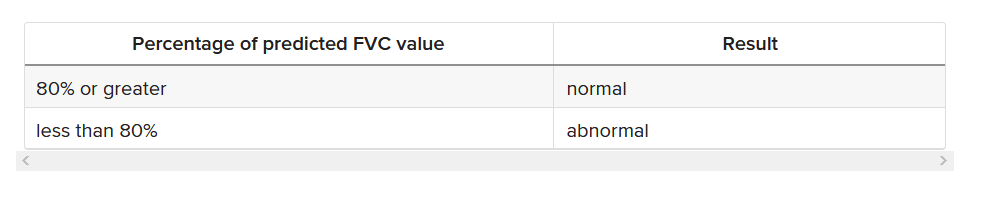

As per the standards mentioned above if FVC is greater than 80% then it is considered to be normal, while the results here show that the person who currently smokes have higher FVC and Percent while the person who never smoke have the least. These results are really contradictive.

We also need to keep in mind that the number of people who never smoked are less than 20 in the dataset given. So we can't conclude this with such less number of people.

In [ ]:
fig = plt.figure(constrained_layout = True, figsize = (12,6))

#create grid

grid = gridspec.GridSpec(ncols = 4, nrows = 1, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])

sns.barplot(x = train.SmokingStatus, y = train.Percent, palette = black_red1, ax = ax1)
ax1.set_title('Percent per Smoking Status')
plt.xticks(rotation=30)


ax2 = fig.add_subplot(grid[0, 2:])
sns.barplot(x = train.SmokingStatus, y = train.FVC, palette = black_red1, ax = ax2)
ax2.set_title('FVC per Smoking Status')
plt.xticks(rotation=40)
plt.show()

# Correlation

We can see from the graph below that only FVC and percent are correlated and not other factors.

In [ ]:
fig = plt.figure(constrained_layout = True, figsize = (20,6))

#create grid

grid = gridspec.GridSpec(ncols = 6, nrows = 1, figure = fig)

ax1 = fig.add_subplot(grid[0, :2])

sns.scatterplot(x=train['FVC'] , y =train['Age'], palette = [black_red[1], black_red[4]], ax = ax1, hue = train['Sex'],
               style = train['Sex'])
ax1.set_title('Correlation between FVC and Age')
ax1.legend(loc = 'lower right')

ax2 = fig.add_subplot(grid[0, 2:4])
sns.scatterplot(x='FVC', y='Percent', data = train, palette = [black_red[1], black_red[4]], ax = ax2, hue = train['Sex'],
               style = train['Sex'])
ax2.set_title('Correlation between FVC and Percent')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(grid[0, 4:6])
sns.scatterplot(x='Percent', y='Age', data = train, palette = [black_red[1], black_red[4]], ax = ax3, hue = train['Sex'],
               style = train['Sex'])
ax3.set_title('Correlation between Percent and Age')
ax3.legend(loc = 'upper right')
plt.show()

# References

1. The Sunburst and the colours are being referred from the following notebook https://www.kaggle.com/datafan07/eda-modelling-of-the-external-data-inc-ensemble

2. https://www.pulmonaryfibrosis.org/life-with-pf/about-pf

Don't forget to give your valuable feedback and suggestions.